<a href="https://colab.research.google.com/github/denner-bocardi/multivariate_dataset_random_forest/blob/main/multivariate_dataset_random_forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multivariate Dataset

This project is part of a data science course. The objective of the project is to learn how do we can trat datasets with a lot o variables. To see what variables is more important to the model and what variables is not so important.

# The Dataset

This dataset is found in the UCI Machine Learning Repository. You can se access it [here](https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients).

## Dataset information

This research aimed at the case of customers default payments in Taiwan and compares the predictive accuracy of probability of default among six data mining methods. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients.

## Attribut Information

1. **id**: identification of the customer
2. **limit_bal**: amount of the given credit 
3. **gender**: 1 = Male; 2 = Female
4. **education**: 1 = graduate school; 2 = university; 3 = high school; 4 = others
5. **marital status**: 1 = married; 2 = single; 3 = others
6. **age**: age of the customer in years
7. **pay_0 to pay_6**: history of past payment, the measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above. 
8. **bill_amt1 to bill_amt6**: amount of bill statement
9. **pay_amt1 to pay_amt6**: amount of previous payment 
10. **default_payment**: 1 = yes; 0 = no

# Importing basic libraries and the data set

In [3]:
import pandas as pd
import numpy as np

dataset = pd.read_csv('/home/dataset/default_of_credit_card_clients.csv', sep = ';')
dataset.head()

,id_customer,limit_bal,sex,education,marriage,age,pay_0,pay_2,pay_3,pay_4,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default_payment
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


## Random Forest and Dummy Classifier 

First of all we will run a Random Forest Classifier and a Dummy Classifier, the point of this is to see the accuracy of both classifiers so we can hav a baseline accuracy. <br>
Since we have a baseline accuracy we can try to understand which attributes whether or not importants for the model, and we can drop the attributes that are not important, so we can improve performance of the model: the same result with less attributes, this mean, less computational energy spend.

In [4]:
features = dataset.drop(columns = ['id_customer', 'default_payment'])

In [5]:
target = dataset['default_payment']

In [43]:
# Runing the Random Tree Classifier 

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

SEED = 42
np.random.seed(SEED)

x_train, x_test, y_train, y_test = train_test_split(features, target, train_size = 0.20)

random_forest = RandomForestClassifier(n_estimators = 100)
random_forest.fit(x_train,y_train)
pred_random_forest = random_forest.predict(x_test)

acc_random_forest = accuracy_score(y_test, pred_random_forest)

print(f'The accuracy of our Random Forest Classifier is: {round(acc_random_forest*100,2)}%')

The accuracy of our Random Forest Classifier is: 81.31%


In [44]:
# Runnin the Dummy Classifier

from sklearn.dummy import DummyClassifier

dummy = DummyClassifier(strategy = 'stratified')
dummy.fit(x_train,y_train)
pred_dummy = dummy.predict(x_test)

acc_dummy = accuracy_score(y_test, pred_dummy)

print(f'The accuracy of our Random Forest Classifier is: {round(acc_dummy*100,2)}%')

The accuracy of our Random Forest Classifier is: 65.16%


So we know the accuracy of our Random Forest Classifier, and we can compare it with the Dummy Classifier. The Random Forest is way more accurate, as we expected.<br>
Now, once we have a baseline accuracy, our job is to know which attribute we can drop and keep our Random Forest accuracy score.

# Explorting the dataset

Now, we will explore our dataset to understand how the attributes affect the result of default payment.<br>
First of all, I will plot some graphics so that we can visualize our attributes more clearly

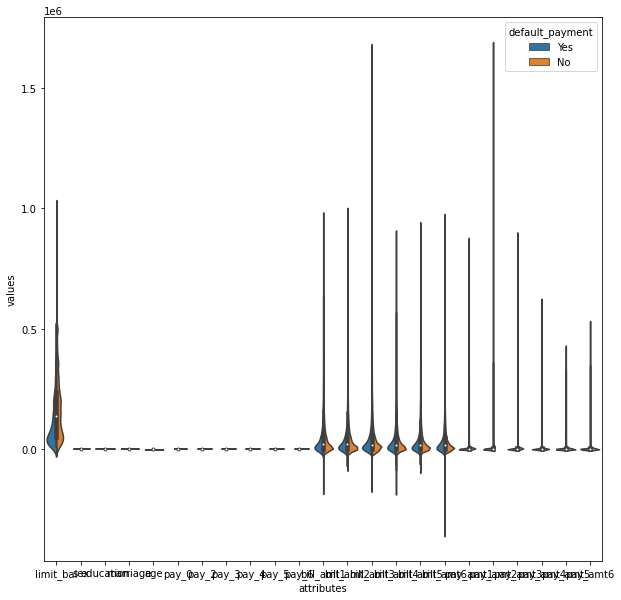

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# preparing the dataset to a violin plot
dataset_plot = pd.concat([target,features], axis = 1)
dataset_plot = pd.melt(dataset_plot, 
                     id_vars = 'default_payment',
                     var_name = 'attributes',
                     value_name = 'values')

default_payment_map = {
    1: 'Yes',
    0: 'No'
}
dataset_plot['default_payment'] = dataset_plot['default_payment'].map(default_payment_map)

plt.figure(figsize = (10,10))
sns.violinplot(data = dataset_plot, x = 'attributes', y = 'values', hue = 'default_payment', split = True)

This graphic is terrible, so we will do some modifications to it to get a better view.

First of all, I will use the StandardScaler to get all the attributes on the same scale on graphic.

In [9]:
from sklearn.preprocessing import StandardScaler

standardizer = StandardScaler()
standardizer.fit(features)
features_standardized = standardizer.transform(features)
features_standardized = pd.DataFrame(data = features_standardized,
                                     columns = features.keys())

Now we can plot the graph. For better view, I will separate the attributes in 2 groups.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

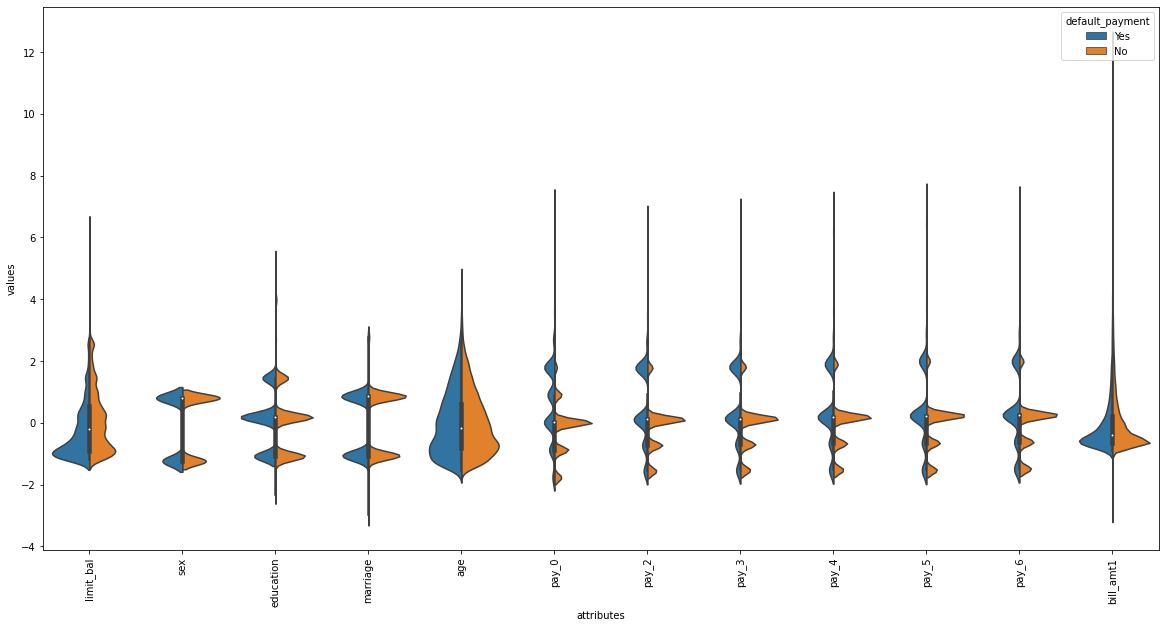

In [10]:
# preparing the dataset to a violin plot
# i will set with iloc to we see the firts 10 attributes on this time
dataset_plot = pd.concat([target,features_standardized.iloc[:,:12]], axis = 1)
dataset_plot = pd.melt(dataset_plot, 
                     id_vars = 'default_payment',
                     var_name = 'attributes',
                     value_name = 'values')

default_payment_map = {
    1: 'Yes',
    0: 'No'
}
dataset_plot['default_payment'] = dataset_plot['default_payment'].map(default_payment_map)

plt.figure(figsize = (20,10))
sns.violinplot(data = dataset_plot, x = 'attributes', y = 'values', hue = 'default_payment', split = True)
plt.xticks(rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text major ticklabel objects>)

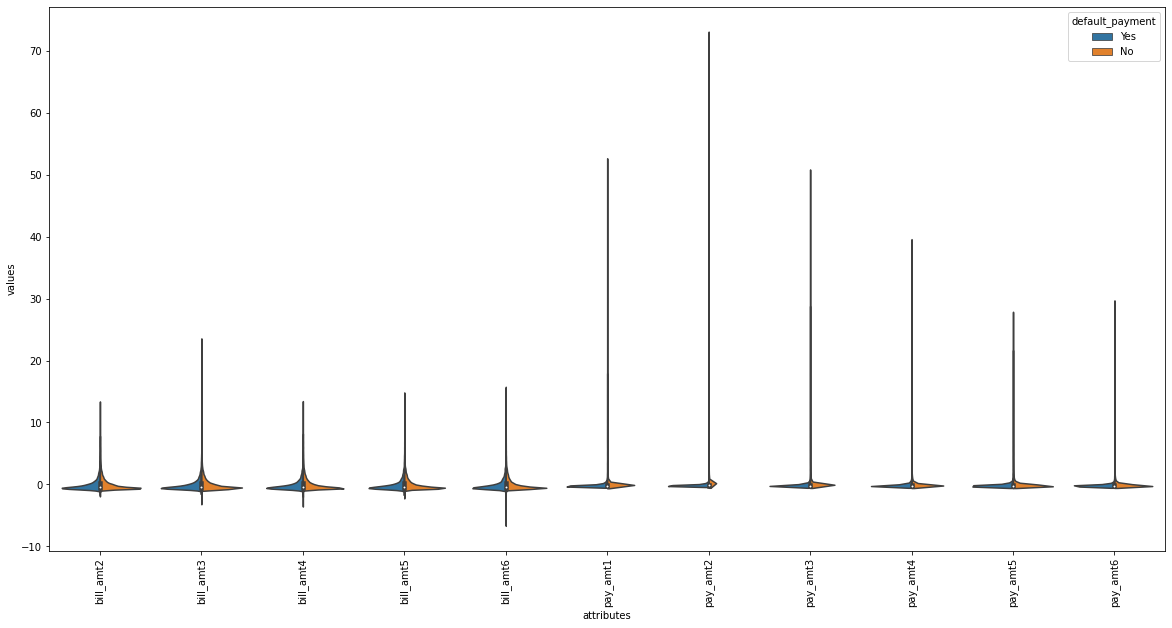

In [11]:
# preparing the dataset to a violin plot
# i will set with iloc to we see the other attributes on this time
dataset_plot = pd.concat([target,features_standardized.iloc[:,12:]], axis = 1)
dataset_plot = pd.melt(dataset_plot, 
                     id_vars = 'default_payment',
                     var_name = 'attributes',
                     value_name = 'values')

default_payment_map = {
    1: 'Yes',
    0: 'No'
}
dataset_plot['default_payment'] = dataset_plot['default_payment'].map(default_payment_map)

plt.figure(figsize = (20,10))
sns.violinplot(data = dataset_plot, x = 'attributes', y = 'values', hue = 'default_payment', split = True)
plt.xticks(rotation = 90)

# The Violon Plot

This is a lot of violin plots. But, what this means?<br>

The violin plot is a great way we can see how an attribute is distribuited. I will use de age plot as an exemple.


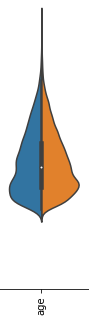

We can see two parts: the blue part means *defaut_payment = 1* and the orange part means *defaut_payment = 0*.<br>
The curve can be seen as an histogram plot of the *age*. The blue can be understood as a histogram of how the *age* attribute is distributed on the *defaut_payment = 1* group, and, as we expect the orange curve can be understood as histogram plot of how the *age* attribute is distributed on the *defaut_payment = 0* group

This means we can say the age is almost equally distributed. 
knowing this we can assume that, this attribute may not be an important decisor to the model estimate if a cliente will or not defalut payment.

Now, if we look at the *pay_0 to pay_6* we can see a difference.


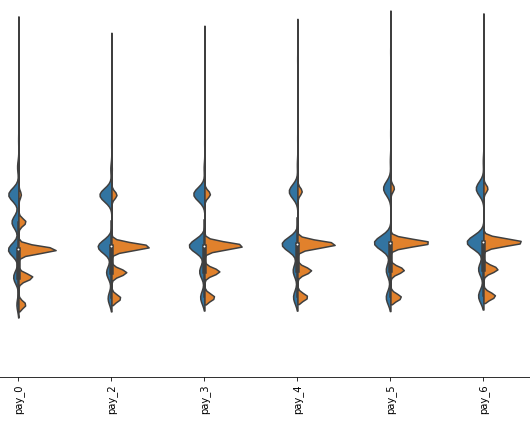

And on the *bill_amt1 to bill_amt6* the violin plots are almost symmetric.

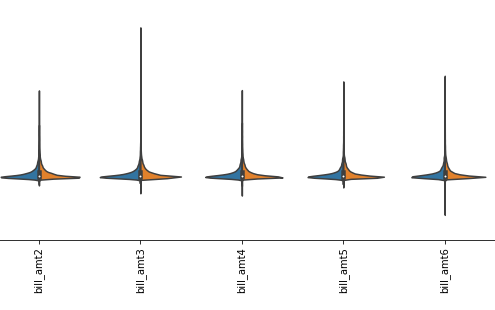

And with the *pay_amt* only the *pay_amt2* is not so symmetric. 

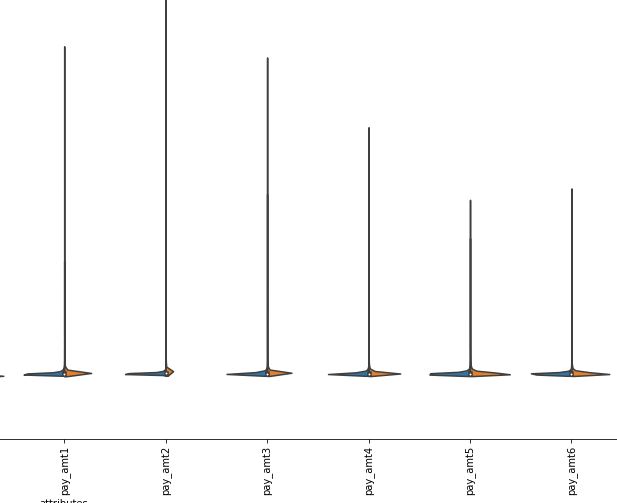

Since this, we assume that the collumns that are more important for the model are the not symmetrics. We will now drop the symmetric columns and see if how the model score.

In [29]:
features_to_drop = ['id_customer',
                    'sex',
                    'education',
                    'marriage',
                    'age',
                    'bill_amt1',
                    'bill_amt2',
                    'bill_amt3',
                    'bill_amt4',
                    'bill_amt5',
                    'bill_amt6',
                    'pay_amt1',
                    'pay_amt3',
                    'pay_amt4',
                    'pay_amt5',
                    'pay_amt6']

new_features = dataset.drop(columns = features_to_drop)

In [48]:
# running the Random Tree Classifier wiht the new group of attributes 
x_train, x_test, y_train, y_test = train_test_split(new_features, target, train_size = 0.20)

random_forest = RandomForestClassifier(n_estimators = 100)
random_forest.fit(x_train,y_train)
pred_random_forest = random_forest.predict(x_test)

acc_random_forest = accuracy_score(y_test, pred_random_forest)

print(f'The accuracy of our Random Forest Classifier is: {acc_random_forest*100}%')

The accuracy of our Random Forest Classifier is: 100.0%


As we can see the new estimator is even better than the other one. The idea is just not to be worse than the other, but it got improved by dropping the attributes.<br>
We now have a smaller dataset, that is as good (or better) than the other one with a lot of attributes, we are now more efficient to decide if a client whether or not to default payment next month.

# Thank You!